In [1]:
import os
import glob as glob
import timecorr as tc
import hypertools as hyp
import numpy as np
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import timecorr as tc
from timecorr.helpers import isfc, wisfc, mean_combine, corrmean_combine


In [2]:
figdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/figs'

In [3]:
datadir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/data'

In [4]:
pieman_data = loadmat(os.path.join(datadir, 'pieman_data.mat'))
pieman_conds = ['intact', 'paragraph', 'word', 'rest']

In [5]:
debug = True

In [6]:
if debug:
    data = []
    conds = []
    for c in pieman_conds:
        next_data = list(map(lambda i: pieman_data[c][:, i][0][:2000,:100], np.arange(4)))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

else:

    data = []
    conds = []
    for c in pieman_conds:
        next_data = list(map(lambda i: pieman_data[c][:, i][0], np.arange(pieman_data[c].shape[1])))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

In [7]:
data = np.array(data)
conds = np.array(conds)

In [8]:
intact = hyp.describe(list(data[conds == 'intact']), reduce='PCA', show=False)
paragraph = hyp.describe(list(data[conds == 'paragraph']), reduce='PCA', show=False)
word = hyp.describe(list(data[conds == 'word']), reduce='PCA', show=False)
rest = hyp.describe(list(data[conds == 'rest']), reduce='PCA', show=False)

/usr/local/lib/python3.6/site-packages/hypertools/tools/describe.py:61: UserWarning: When input data is large, this computation can take a long time.
  warnings.warn('When input data is large, this computation can take a long time.')


In [9]:
pca_pd = pd.DataFrame({'intact':intact['average'],'paragraph':paragraph['average'],'word':word['average'],'rest':rest['average']})


In [10]:
pca_pd.head()

,intact,paragraph,word,rest
0,0.779106,0.719487,0.860120,0.595672
1,0.816561,0.792691,0.880094,0.671437
2,0.832539,0.816929,0.902147,0.725340
3,0.860658,0.838560,0.914553,0.784812
4,0.878177,0.859665,0.920536,0.804340


In [11]:
pieman_conds

['intact', 'paragraph', 'word', 'rest']

0
1


/usr/local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


2
3


No handles with labels found to put in legend.


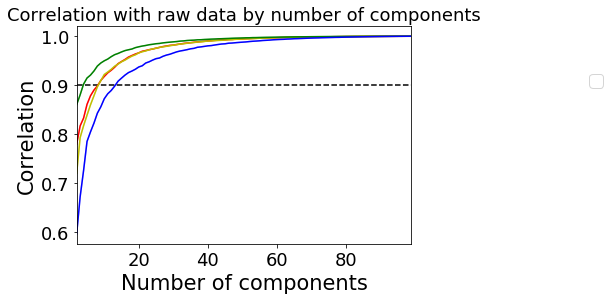

In [12]:

max_dims = len(intact['average'])
colors=['r', 'y', 'g', 'b']
fig, ax = plt.subplots()
for i, c in enumerate(pieman_conds):
    print(i)
    sns.tsplot(data=pca_pd[c], time=[n for n in range(2, max_dims+2)], color=colors[i], err_style="unit_traces", ax=ax)
ax.set_title('Correlation with raw data by number of components')
ax.set_ylabel('Correlation')
ax.set_xlabel('Number of components')
ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.75), ncol=1)
plt.axhline(y=.9, c='k',linestyle='dashed',zorder=-1)
plt.show()

## pieman pca decoding

In [13]:
resultsdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/pca_decode/PCA/ndims_100'

In [14]:
conds =glob.glob(os.path.join(resultsdir, '*.csv'))

In [15]:
full_data = pd.DataFrame()
for c in conds:
    data = pd.read_csv(c)
    data['condition'] = os.path.basename(os.path.splitext(c)[0])

    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)

In [16]:
full_data[full_data['condition']=='intact'].head()

,Unnamed: 0,rank,accuracy,error,dims,folds,iteration,condition
0,0,0.804556,0.003333,0.490789,1,0,0,intact
1,0,0.736578,0.013333,0.311922,2,0,0,intact
2,0,0.746411,0.030000,0.273533,3,0,0,intact
3,0,0.820956,0.036667,0.236167,4,0,0,intact
4,0,0.865200,0.063333,0.246467,5,0,0,intact


In [17]:
outfile = os.path.join(figdir, 'Accuracy_by_components.pdf')

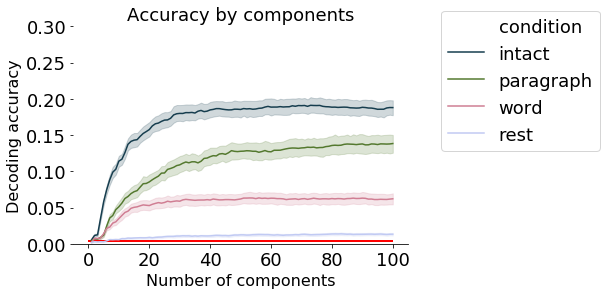

In [18]:
fig, ax = plt.subplots()
sns.lineplot(x="dims", y="accuracy",
             hue="condition",
             data=full_data, ax=ax, palette="cubehelix", hue_order=['intact', 'paragraph', 'word', 'rest'])
sns.despine(ax=ax, left=True)
ax.set_title('Accuracy by components')
ax.set_ylabel('Decoding accuracy',fontsize=16)
ax.set_xlabel('Number of components',fontsize=16)
ax.set_ylim(0, .3)
ax.hlines(y=1/300, xmin=0, xmax=100, linewidth=2, color='r')
ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.75), ncol=1)
fig.savefig(outfile, bbox_inches='tight')

In [19]:
resultsdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/pca_decode_chunked/PCA/ndims_100'

In [20]:
conds =glob.glob(os.path.join(resultsdir, '*.csv'))

In [21]:
full_data = pd.DataFrame()
for c in conds:
    data = pd.read_csv(c)
    data['condition'] = os.path.basename(os.path.splitext(c)[0])

    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)

In [22]:
full_data[full_data['condition']=='intact'].head()

,Unnamed: 0,rank,accuracy,error,dims,folds,iteration,third,condition
0,0,0.7521,0.01,0.4680,1,0,0,0,intact
1,0,0.7176,0.03,0.3244,2,0,0,0,intact
2,0,0.7540,0.07,0.2804,3,0,0,0,intact
3,0,0.7844,0.07,0.2473,4,0,0,0,intact
4,0,0.8877,0.14,0.2151,5,0,0,0,intact


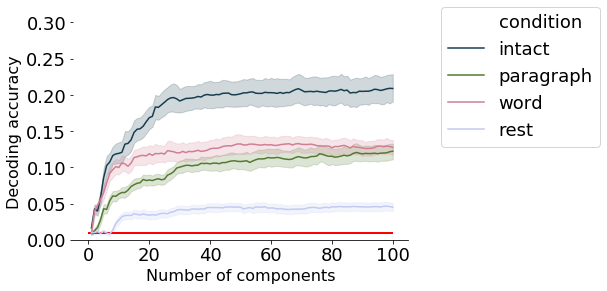

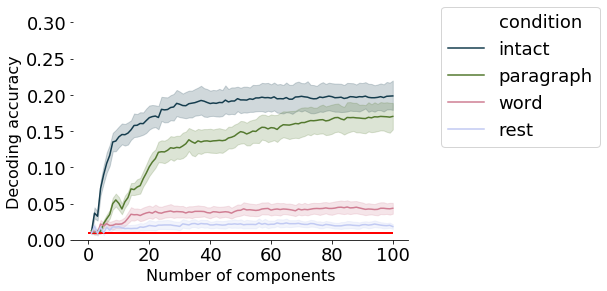

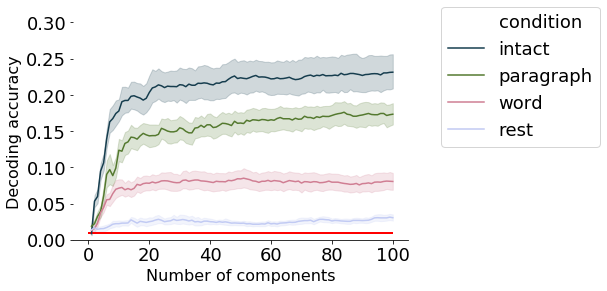

In [23]:
for i in range(3):
    outfile = os.path.join(figdir, 'Accuracy_by_components_third_' + str(i) + '.pdf')
    fig, ax = plt.subplots()
    sns.lineplot(x="dims", y="accuracy",
                 hue="condition",
                 data=full_data[full_data['third']==i], ax=ax, palette="cubehelix", hue_order=['intact', 'paragraph', 'word', 'rest'])
    sns.despine(ax=ax, left=True)
    #ax.set_title('Accuracy by components for third: ' + str(i + 1))
    ax.set_ylabel('Decoding accuracy',fontsize=16)
    ax.set_xlabel('Number of components',fontsize=16)
    ax.set_ylim(0, .3)
    ax.hlines(y=1/100, xmin=0, xmax=100, linewidth=2, color='r')
    ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.75), ncol=1)
    fig.savefig(outfile, bbox_inches='tight')